<div class="alert-warning" style="font-size:250%">
CS110 assignment 1
</div>

Instead of a mini-project, which you will encounter in many of the upcoming CS110 assignments, in this first assignment you will be solving three independent problems. Use this opportunity to start your work early, finishing a question every week or so. Ideally, in the last week before the deadline, you will only have Q3 left to complete.

Feel free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the CS110 course guide:
- on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.
- on the resources you are expected to submit with each assignment submission.

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

-----------------------------------------------

**Setting up notes:**
1. Before you turn this problem in, make sure everything runs as expected. Click on `Kernel`$\rightarrow$`Restart and Run All`.

2. Do not change the names of the functions provided in the skeleton codes. 

3. Make sure you fill in any place that says `###YOUR CODE HERE` or "YOUR ANSWER HERE". Below, you will identify your name and collaborators.

NAME = "Catherine Jackson"

COLLABORATORS = ""

# Iteration vs. recursion

A [Fibonacci Sequence](https://en.wikipedia.org/wiki/Fibonacci_number) is a list of numbers, in which each number is the sum of the two previous ones (starting with 0 and 1). Mathematically, we can write it as:
- F(0) = 0
- F(1) = 1
- F(n) = F(n-1) + F(n-2) for n larger than 1.

Your task is to compute the **n**th number in the sequence, where **n** is an input to the function.

**(a)** Use the code skeletons below to **provide two solutions** to the problem: an **iterative**, and a **recursive** one. For the recursive solution, feel free to use a helper function or add keyword arguments to the given function.

**(b)** In roughly 150 words: 
- **explain** how your solutions follow the iterative and recursive paradigms, respectively. 
- **discuss the pros and cons** of each approach as applied to this problem, and state which of your solutions you think is better, and why. Feel free to complement your answer with plots, if appropriate.
- provide a word count.

In [18]:
def fibonacci_iterative(n):
    '''
    Computes the nth value in the fibonacci sequence by adding the 2 previous values in an iterative manner.
    
    Parameters
    ----------
    n:int
        the index of the number in the fibonacci sequnce
        
    Returns
    ----------
    c:int
        nth value in fibonacci sequence
    '''
    
    # check that n is a positive integer or 0 to continue
    if (n < 0) or (n % 1 != 0):
        print('ERROR: try a positive integer or 0')
        return False
    
    # if n is 0 or 1, return respective value
    if n < 2:
        return n
    
    # initiate f(n-2) and f(n-1), previous 2 values in fibonacci sequence
    a = 0
    b = 1
    
    # calculates next number i times, sets a and b to be previous 2 values in the sequence
    for i in range(n-1):
        c = a + b 
        a = b
        b = c
    
    return c



def fibonacci_recursive(n):
    '''
    Computes the nth value in the fibonacci sequence by adding the 2 previous values in an recursive manner.
    
    Parameters
    ----------
    n:int
        the index of the number in the fibonacci sequnce
        
    Returns
    ----------
    c:int
        nth value in fibonacci sequence
    '''
    
    # check that n is a positive integer or 0 to continue
    if (n < 0) or (n % 1 != 0):
        print('ERROR: try a positive integer or 0')
        return False
    
    # if n is 0 or 1, return respective value
    if n < 2:
        return n
    
    # calls function, first n-1 then n-2 is run until 0 or 1 is returned, works its way up the function call loop
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)


    
assert fibonacci_iterative(0) == 0
assert fibonacci_recursive(0) == 0
assert fibonacci_iterative(4) == 3
assert fibonacci_recursive(4) == 3
assert fibonacci_iterative(5.5) == False
assert fibonacci_recursive(5.5) == False
assert fibonacci_iterative(-1) == False
assert fibonacci_recursive(-1) == False

ERROR: try a positive integer or 0
ERROR: try a positive integer or 0
ERROR: try a positive integer or 0
ERROR: try a positive integer or 0


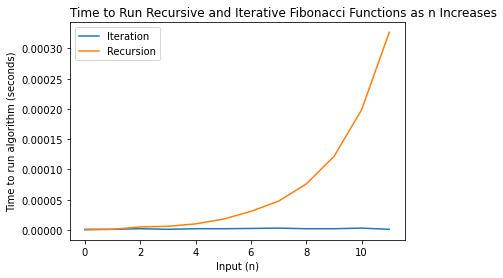

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

# set range of values for inputs, and empty arrays for time taken
x = np.arange(0, 12, 1)
y_iter = []
y_recur = []


# loop through input values
for i in x:
    time_iter = []
    
    # run function many times, creating array of times taken
    for a in range(1000):
        start = time.time()
        fibonacci_iterative(i)
        end = time.time()
        time_iter.append(end-start)
        
    # take average of time taken to run iterative function for input i
    y_iter.append(sum(time_iter)/len(time_iter))

    
# loop through input values
for j in x:
    time_recur = []
    
    # run function many times, creating array of times taken
    for b in range(1000):
        start = time.time()
        fibonacci_recursive(j)
        end = time.time()
        time_recur.append(end-start)
        
    # take average of time taken to run recursive function for input j
    y_recur.append(sum(time_recur)/len(time_recur))

# plot times for iterative and recursive functions on same graph to compare
plt.plot(x, y_iter)
plt.plot(x, y_recur)
plt.title('Time to Run Recursive and Iterative Fibonacci Functions as n Increases', loc='left')
plt.xlabel('Input (n)')
plt.ylabel('Time to run algorithm (seconds)')
plt.legend(['Iteration', 'Recursion'])
plt.show()

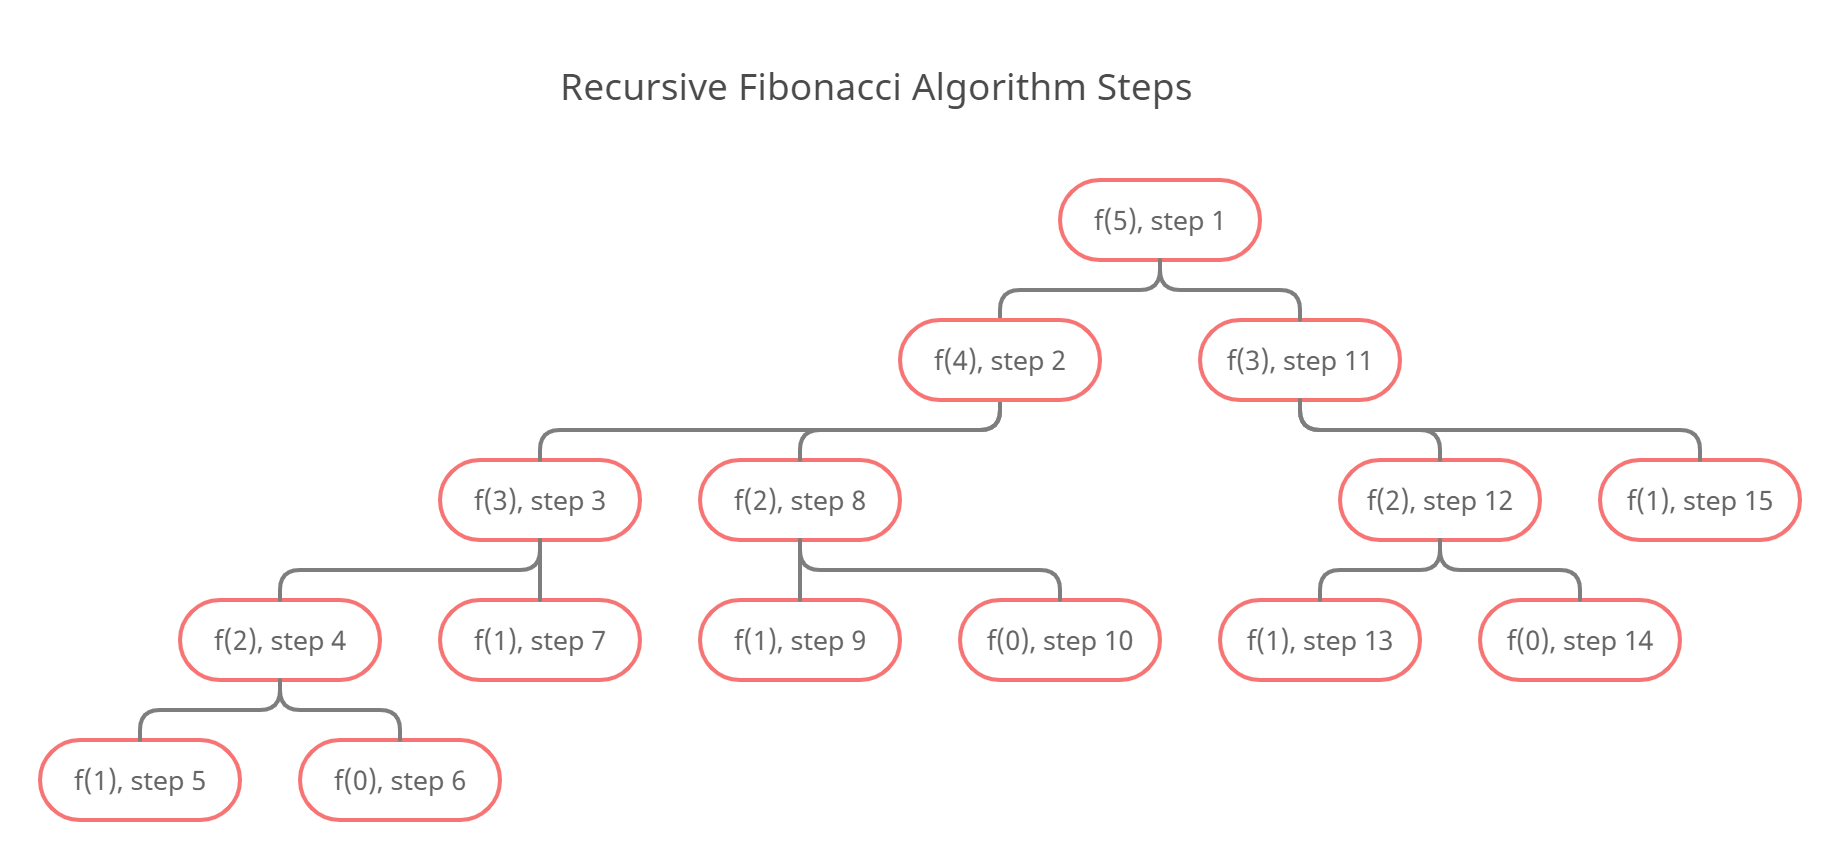

In [20]:
from IPython import display
display.Image('fib_steps.png')

The iterative function repeats a series of steps to iterate to the output, where the input is equal to the number of repeats. The recursive function calls itself in the final stage (tail recursion) to open several internal functions, which can be seen above for the call fibonacci_recursive(5). A step here represents one function call. The base case is reached when n is less than 2, therefore returning the respective value and exiting out of the specific function loop.

As you can see from the graph above, the recursive function takes exponentially more time with increases in the input value, n. Though this time is still very short for the range used above, with larger inputs the time taken becomes increasingly inefficient due to the nested nature of recursion, and the number of function calls made (as you can see in the image above, even with an input of 5, 15 calls are made). The input value is roughly proportional to the number of operations for the iterative solution. The time and complexity of the recursive solution could be reduced significantly by storing results of specific function calls using memoization so that the number of recursions is reduced.

Words: 198

# Understanding and documenting code 
Imagine that you land your dream software engineering job, and among the first things you encounter is a previously written, poorly documented, and commented code.

Asking others how it works proved fruitless, as the original developer left. You are left with no choice but to understand the code’s inner mechanisms, and document it properly for both yourself and others. The previous developer also left behind several tests that show the code working correctly, but you have a hunch that there might be some problems there, too. 

Your tasks are listed below. Here is the code (please do not edit the following cell!):

In [21]:
def my_sort(array):
    """
    YOUR DOCSTRING HERE
    """
    
    # ...
    for i in range(len(array)):
        
        # ...
        item = array[i]
        
        # ...
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # ...
        if i == intended_position:
            continue
        
        # ...
        array[intended_position], item = item, array[intended_position]
        
        # ...
        while i != intended_position:
            
            # ...
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
            
            # ...
            array[intended_position], item = item, array[intended_position]
            
    return array

**(a)** Explain, in your own words, what the code is doing (it’s sorting an array, yes, but **how**?). Feel free to use diagrams, play around with the code in other cells, print test cases or partially sorted arrays, draw step by step images. In the end, you should produce an approximately 150-word write-up of how the code is processing the input array.

The code loops through all positions in the array, storing the number at the ith position in 'item'. It counts how many numbers in the array are smaller than item, storing this in a variable 'intended_position'. If the number is already in the correct position (eg. 2 numbers are smaller, and the number holds index 2 already), we return to the beginning of the for loop with the next index i. If not, we insert item into the position of the array it should hold, storing the number there in item (swap the number held in item with that held at the intended position in the array). 

We then enter a while loop that runs in the same way to the code above, checking how many numbers are smaller than that held in item, and swapping item with the number at the position it should hold in the array. This process is repeated until the ith position in the array is filled.

This algorithm does not guarantee termination for specific inputs (repeated numbers), as the intended position calculated for all repetitions of the same number will be exactly the same. This means the while loop may never exit, as the number in item and that in the ith position continuously swap, meaning we never reach the termination condition where the ith position in the array is equal to the intended position of the number just stored. 

Words: 236

In [22]:
def my_sort(array):
    """
    YOUR DOCSTRING HERE
    """
    
    # ...
    for i in range(len(array)):
        
        # ...
        item = array[i]
        print('i:', i, '\t item:', item, '\t array:', array)
        
        # ...
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # ...
        if i == intended_position:
            continue
        
        # ...
        array[intended_position], item = item, array[intended_position]
        print('i:', i, '\t item:', item, '\t array:', array)
        
        # ...
        while i != intended_position:
            
            # ...
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
            
            # ...
            array[intended_position], item = item, array[intended_position]
            print('i:', i, '\t item:', item, '\t array:', array)
            
    return array

In [23]:
my_sort([1, 2, 9, 3, 4])

i: 0 	 item: 1 	 array: [1, 2, 9, 3, 4]
i: 1 	 item: 2 	 array: [1, 2, 9, 3, 4]
i: 2 	 item: 9 	 array: [1, 2, 9, 3, 4]
i: 2 	 item: 4 	 array: [1, 2, 9, 3, 9]
i: 2 	 item: 3 	 array: [1, 2, 9, 4, 9]
i: 2 	 item: 9 	 array: [1, 2, 3, 4, 9]
i: 3 	 item: 4 	 array: [1, 2, 3, 4, 9]
i: 4 	 item: 9 	 array: [1, 2, 3, 4, 9]


[1, 2, 3, 4, 9]

**(b)** Explain the difference between docstrings and comments. Add **both** a proper docstring and in-line comments to the code. You can follow the empty comments to guide you, but you can deviate, within reason. 

Please keep in mind:
- Anyone from your section should be able to understand the code from your documentation. - Remember, however, that brevity is also a desirable feature.
- Please do not modify the code above. Include your docstrings and in-line comments in the cell below instead. This is important—you want to keep track of your changes!

Docstrings are used to describe the overall point of the function. They are also used to outline the different parameters, errors, and returns of the function. Users can also access the docstring, helping them to understand how to use the function. In this case, the docstring may only tell me that the code sorts a list in ascending order, but doesn't allow me to understand how the code does this. Without this information, we cannot fully unpack it's complexity or efficiency. Furthermore, we don't know if this specific sorting algorithm is the one we want to use for a specific application, as we cannot compare it to others.

Comments can explain smaller segments of the code, especially tricky sections, so that you or others can understand your code. They can also be used to justify certain choices made throughout your code. They can help us to understand precisely how the code works so we are able to compare it to other sorting algorithms in this case and analyse it's efficiency and complexity.

Words: 172

In [24]:
def my_sort(array):
    """
    This function sorts an array in ascending order.

    Parameters
    ----------
    array : list
        List of numbers we wish to put into ascending order.
    
    Returns
    -------
    array : list
        List of input numbers in ascending order.
        
    """
    
    # for loop runs through each position in array
    for i in range(len(array)):
        
        # item set to ith number of array
        item = array[i]
        
        # count numbers smaller than item, store in intended_position
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # skip rest of for loop if item is in the correct position, move to next value of i
        if i == intended_position:
            continue
        
        # swap the values of item and the number in the array at the desired position for item
        array[intended_position], item = item, array[intended_position]
        
        # runs until a number placed into the position i
        while i != intended_position:
            
            # count numbers smaller than item, store in intended_position
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
            
            # swap the values of item and the number in the array at the desired position for item
            array[intended_position], item = item, array[intended_position]
            
    return array

**(c)** The previous developer included the following test cases with their code:
```
(1) assert my_sort([8, 5, 7]) == [5, 7, 8]

(2) assert my_sort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

(3) input_array = [43, 99, 85, 45, 21, 58, 24, 12, 14, 64, 
19, 94, 56, 13, 51, 2, 37, 11, 8, 66, 3, 95, 93, 53, 35, 
81, 97, 9, 47, 78, 27, 50, 82, 71, 62, 59, 57, 42, 69, 72, 
30, 63, 18, 31, 32, 88, 92, 73, 10, 74, 41, 22, 1, 80, 5, 
60, 76, 52, 49, 77, 54, 44, 15, 7, 28, 84, 33, 83, 16, 91, 
67, 23, 87, 25, 79, 89, 34, 4, 38, 48, 6, 96, 39, 40, 68, 
55, 20, 36, 29, 65, 86, 70, 26, 98, 46, 90, 17, 0, 61, 75]
assert my_sort(input_array) == sorted(input_array)
```

They are *not* sufficient though. Explain why not and fix the code in the cell below.

There are a number of difference input cases which these assert statements don't use:
* pre-sorted list
* almost-sorted list
* randomly-generated lists
* input of a single number
* input of 0
* input with repeated numbers
* input with negative numbers
* input with a mixture of negative and positive numbers
* input with decimals/fractions
* larger inputs (longer lists)

Because of this, we may have not noticed exceptions to the code that may cause it to return an unexpected output. Using a range of different inputs that cover lots of different situations ensures that we are able to identify bugs in our code and fix them so that it performs as expected. Using randomly-generated lists can reduce any form of bias we may have when generating test cases. This can also allow us to run many lists in a fast amount of time to check even more cases.

When testing the code, I encountered errors with lists in which there were repeated numbers, as the code entered an infinite while loop as it tried to continuously swap the first repeated numbers with each other. I overcame this by adding a while loop that added to the intended position for repeated numbers to place each subsequent number at the end of the current repeated numbers.

There were also some indexing errors that occurred for arrays such as [6, 7, 1]. This happened when the largest number in the array was stored in item, so the for loop to count the numbers smaller than 7 only compared it to the array [6, 6, 1]. This meant that 3 was stored in intended_position, an index not present in the array. I overcame this by only comparing values with those to the right of the current index i, and not i itself, so intended position never exceeded the index range of array.

Words: 302

In [25]:
def my_sort(array):
    """
    This function sorts an array in ascending order.

    Parameters
    ----------
    array : list
        List of numbers we wish to put into ascending order.
    
    Returns
    -------
    array : list
        List of input numbers in ascending order.
        
    """
    
    # for loop runs through each position in array (last 2 not needed as should already be in the correct place)
    for i in range(len(array) - 1):
        
        # item set to ith number of array
        item = array[i]
        
        # set position equal to last sorted number in array
        intended_position = i
        
        # count numbers smaller than item in unsorted array, add to intended_position
        for num in range(i+1, len(array)):
            if array[num] < item:
                intended_position += 1
                
        # skip rest of for loop if item is in the correct position, move to next value of i
        if i == intended_position:
            continue
        
        # account for repeated numbers, move position to right for each
        while item == array[intended_position]:
            intended_position += 1
        
        # swap the values of item and the number in the array at the desired position for item
        array[intended_position], item = item, array[intended_position]
        
        # runs until a number placed into the position i, created sorted subarray: array[0:i+1]
        while i != intended_position:
            
            # count numbers smaller than item, store in intended_position
            intended_position = i
            
            # count numbers smaller than item in unsorted array, add to intended_position
            for num in range(i+1, len(array)):
                if array[num] < item:
                    intended_position += 1
            
            # account for repeated numbers, move position to right for each
            while item == array[intended_position]:
                intended_position += 1
            
            # swap the values of item and the number in the array at the desired position for item
            array[intended_position], item = item, array[intended_position]
            
    return array


assert my_sort([8, 5, 7]) == [5, 7, 8]
assert my_sort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

input_array = [43, 99, 85, 45, 21, 58, 24, 12, 14, 64, 
19, 94, 56, 13, 51, 2, 37, 11, 8, 66, 3, 95, 93, 53, 35, 
81, 97, 9, 47, 78, 27, 50, 82, 71, 62, 59, 57, 42, 69, 72, 
30, 63, 18, 31, 32, 88, 92, 73, 10, 74, 41, 22, 1, 80, 5, 
60, 76, 52, 49, 77, 54, 44, 15, 7, 28, 84, 33, 83, 16, 91, 
67, 23, 87, 25, 79, 89, 34, 4, 38, 48, 6, 96, 39, 40, 68, 
55, 20, 36, 29, 65, 86, 70, 26, 98, 46, 90, 17, 0, 61, 75]
assert my_sort(input_array) == sorted(input_array)

assert my_sort([1, 2, 3, 4, 5]) == [1, 2, 3, 4, 5]
assert my_sort([0]) == [0]
assert my_sort([5]) == [5]
assert my_sort([1, -1]) == [-1, 1]
assert my_sort([-5, 10, 7, -23, -1, 0, 92, 2]) == [-23, -5, -1, 0, 2, 7, 10, 92]
assert my_sort([1, 2, 5, 3, 4]) == [1, 2, 3, 4, 5]
assert my_sort([1, 2, 6, 5]) == [1, 2, 5, 6]

import random
def randlist(n):
    randlist = []
    [randlist.append(random.randint(0, n)) for i in range(n)]
    return randlist

randlist100 = randlist(100)
randlist1000 = randlist(1000)
assert my_sort(randlist100) == sorted(randlist100)
assert my_sort(randlist1000) == sorted(randlist1000)

# New and mixed sorting approaches 
In this question, you will implement and critique a previously unseen sorting algorithm. You will then combine it with another, known sorting algorithm, to see whether you can reach better behavior. 

**(a)** Use the following pseudocode to implement `merge_3_sort()`. It is similar to merge sort—only that instead of splitting the initial array into halves, you will now split it into thirds, call the function recursively on each sublist, and then merge the triplets together. You might want to refer to this [beautiful resource](https://drive.google.com/file/d/1XH5bNiHhVchVWoCDLBtvjsCFkL9cU0do/view?pli=1) written by Prof. Drummond for details about the regular merge sort algorithm.

In [26]:
def merge_3_sort(array, p, q):
    """
    Sorts array[p] to array[q] in place.
    E.g., to sort an array A, we will run 
    `merge_3_sort(A, 0, len(A))`.

    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """

    # bottoms out at base case of len(0/1) as no division is left to do
    if q - p > 1:
        mid1 = int(p + ((q - p) / 3))
        mid2 = int(p + 2 * (q - p) / 3)
        
        # recursively call merge_sort with smaller subarrays
        merge_3_sort(array, p, mid1)
        merge_3_sort(array, mid1, mid2)
        merge_3_sort(array, mid2, q)
    
        # sort section of array
        merge_3(array, p, mid1-1, mid2-1, q-1)
    
    return array
    

    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists 
    (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) 
    in place.
    
    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of first element of first sublist
    q : int
        index of last element of first sublist
    r : int
        index of last element of second sublist
    s : int
        index of last element of third sublist

    """

    L = []
    M = []
    R = []
    
    # copy 3 sections of A onto L, M and R
    for i in range(p, q+1):
        L.append(array[i])
    for j in range(q+1, r+1):
        M.append(array[j])
    for k in range(r+1, s+1):
        R.append(array[k])
        
    # add sentinel value to avoid indexing errors
    L.append(float('inf'))
    M.append(float('inf'))
    R.append(float('inf'))
    
    a = b = c = 0
    
    # puts smallest number on left of arrays L, M and R into A[p:s+1] in-place
    for index in range(p, s+1):
        
        # uses <= otherwise numbers that are equal won't be added, and else statement run until end of R array
        if L[a] <= R[c] and L[a] <= M[b]:
            array[index] = L[a]
            a += 1
        elif M[b] <= L[a] and M[b] <= R[c]:
            array[index] = M[b]
            b += 1
        else:
            array[index] = R[c]
            c += 1

    return array

**(b)** Run at least 5 assert statements, which showcase that your code works as intended. In a few sentences, justify why your set of tests is appropriate and possibly sufficient.

I have used a variety of lists, including randomly-generated lists up to 1000 integers long, pre-ordered lists, reversed lists, empty lists, and lists containing negatives to check if my code works as it should. This is appropriate to ensure that there are no edge cases for which my code does not work, or exceptions to its proper function. The use of pseudo-randomly-generated lists reduces the bias that I may have in creating lists. The use of python's sorted function ensures that I don't make any errors in checking the lists sorted by the 3-way merge function. 

Words: 96

In [27]:
# TESTING MERGE_3_SORT

# using randlist function created in question 2c to test random arrays
randlists = []
[randlists.append(randlist(i)) for i in range(1, 1000)]

for r in randlists:
    merged = merge_3_sort(r, 0, len(r))
    assert (merged == sorted(r))

# ordered, reversed, negative, empty arrays testing
lists = [[], [1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [-4, 3, -1, 2, 3, 0, -1, 8]]
for l in lists:
    merged = merge_3_sort(l, 0, len(l))
    assert (merged == sorted(l))
    
# subarrays of array
subarray_lists = []
[subarray_lists.append(randlist(i)) for i in range(1, 100)]

for ra in subarray_lists:
    start = random.randint(0, len(ra))
    end = random.randint(start, len(ra))
    sort = []
    
    # create assertion list containing known sorted subarray
    for i in ra[0:start]:
        sort.append(i)
    for i in sorted(ra[start:end]):
        sort.append(i)
    for i in ra[end:]:
        sort.append(i)
        
    merged = merge_3_sort(ra, start, end)
    assert (merged == sort)

**(c)** The algorithm becomes unnecessarily complicated when it tries to sort a really short piece of the original array, continuing the splits into single-element arrays. To work around this:

1. add a condition so that the algorithm uses selection sort (instead of continuing to recurse) if the input sublist length is below a certain threshold (which you should identify). 
2. justify on the basis of analytical **and** experimental arguments what might be the optimal threshold for switching to selection sort.
3. include at least 5 assert statements that offer evidence that your code is correctly implemented.

To ensure you won’t break your old code, first copy it to the cell below, and then create the new version in the code cell provided below.

In [28]:
def merge_3_threshold(array, p, q, t):
    """
    Sorts array[p] to array[q] in place, using selection sort to order subarrays below the threshold length.
    E.g., to sort an array A with a threshold of recursion at 5, we will run 
    `merge_3_threshold(A, 0, len(A), 5)`.

    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted
    t : int
        threshold value to exit recursion and sort by selection instead
        
    Returns
    -------
    array: a sorted Python list

    """
    
    # selection sort replaces recursion when threshold is reached to reduce complication
    if len(array[p:q+1]) < t:
        
        # nested for loops create all combinations of pairs of values (i, j) in the subarray
        for i in range(p, q-1):
            minidx = i
            
            for j in range(i+1, q):
                
                # swap where number on the right is smaller
                if array[j] < array[minidx]:
                    minidx = j
                    
            array[i], array[minidx] = array[minidx], array[i]
    
    else:
        mid1 = int(p + ((q - p) / 3))
        mid2 = int(p + 2 * (q - p) / 3)
        
        # recursively call merge_sort with smaller subarrays
        merge_3_threshold(array, p, mid1, t)
        merge_3_threshold(array, mid1, mid2, t)
        merge_3_threshold(array, mid2, q, t)
    
        # sort section of array
        merge_3(array, p, mid1-1, mid2-1, q-1)
    
    return array
    

    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists 
    (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) 
    in place.
    
    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of first element of first sublist
    q : int
        index of last element of first sublist
    r : int
        index of last element of second sublist
    s : int
        index of last element of third sublist

    """

    L = []
    M = []
    R = []
    
    # copy 3 sections of A onto L, M and R
    for i in range(p, q+1):
        L.append(array[i])
    for j in range(q+1, r+1):
        M.append(array[j])
    for k in range(r+1, s+1):
        R.append(array[k])
        
    # add sentinel value to avoid indexing errors
    L.append(float('inf'))
    M.append(float('inf'))
    R.append(float('inf'))
    
    a = b = c = 0
    
    # puts smallest number on left of arrays L, M and R into A[p:s+1] in-place
    for index in range(p, s+1):
        
        # uses <= otherwise numbers that are equal won't be added, and else statement run until end of R array
        if L[a] <= R[c] and L[a] <= M[b]:
            array[index] = L[a]
            a += 1
        elif M[b] <= L[a] and M[b] <= R[c]:
            array[index] = M[b]
            b += 1
        else:
            array[index] = R[c]
            c += 1

    return array

In [29]:
# TESTING MERGE_3_THRESHOLD

# using randlist function created in question 2c to test random arrays
randlists = []
[randlists.append(randlist(i)) for i in range(10, 1000)]

for r in randlists:
    merged = merge_3_threshold(r, 0, len(r), 8)
    assert (merged == sorted(r))

# ordered, reversed, negative, empty arrays testing
lists = [[], [1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [-4, 3, -1, 2, 3, 0, -1, 8]]
for l in lists:
    merged = merge_3_threshold(l, 0, len(l), 3)
    assert (merged == sorted(l))
    
# subarrays of array
subarray_lists = []
[subarray_lists.append(randlist(i)) for i in range(10, 100)]

for ra in subarray_lists:
    start = random.randint(0, len(ra))
    end = random.randint(start, len(ra))
    sort = []
    
    # create assertion list containing sorted subarray
    for i in ra[0:start]:
        sort.append(i)
    for i in sorted(ra[start:end]):
        sort.append(i)
    for i in ra[end:]:
        sort.append(i)
        
    merged = merge_3_threshold(ra, start, end, 8)
    assert (merged == sort)

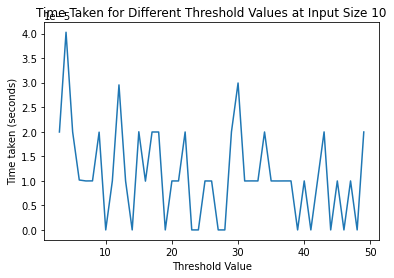

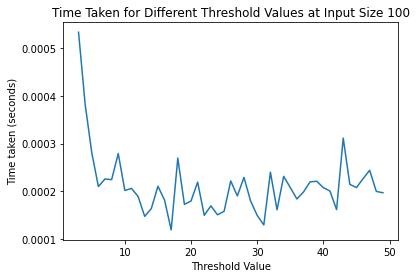

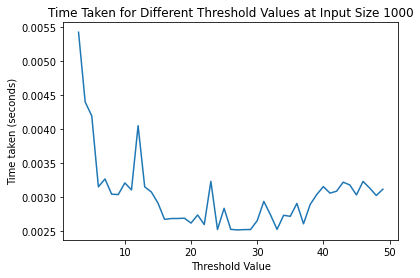

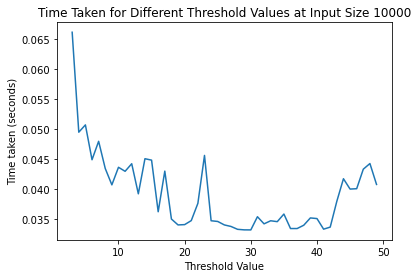

In [30]:
# compare times to run different threshold values for different inputs, (x=threshold, y=input size)
# note: it takes a couple of minutes to generate the graph for input size 10000

# produce graphs of increasing magnitudes of 10
for i in range(1, 5):
    thresholds = [i for i in range(3, 50)]
    times = []
    
    # for range of thresholds
    for t in thresholds:
        time_at_threshold = []
            
        # run each threshold 100 times with random lists
        for a in range(100):
            rand = randlist(10 ** i)
            start = time.time()
            merge_3_threshold(rand, 0, len(rand), t)
            end = time.time()
            time_at_threshold.append(end-start)
        
        # compute averages
        times.append(sum(time_at_threshold)/len(time_at_threshold))
        
    # plot
    plt.plot(thresholds, times)
    plt.title('Time Taken for Different Threshold Values at Input Size %i' % 10**i)
    plt.xlabel('Threshold Value')
    plt.ylabel('Time taken (seconds)')
    plt.show()

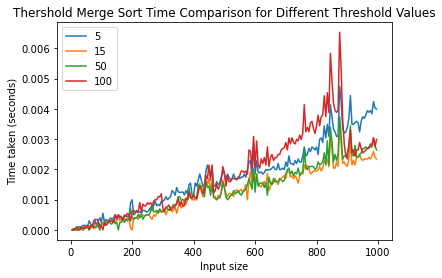

In [31]:
# compare times for 4 different threshold values across input range
# note: it takes a couple of minutes to run this cell

inputs = [i for i in range(5, 1000, 5)]

s = []
sa = []
sb = []
sc = []

# run for range of inputs 5 to 1000
for i in inputs:
    selections = []
    selectionsa = []
    selectionsb = []
    selectionsc = []
    
    # repeat timings of different thresholds 20 times with random lists
    for j in range(20):
        inputi = randlist(i)

        start = time.time()
        merge_3_threshold(inputi, 0, len(inputi), 5)
        end = time.time()
        selections.append(end-start)
        
        start = time.time()
        merge_3_threshold(inputi, 0, len(inputi), 15)
        end = time.time()
        selectionsa.append(end-start)
        
        start = time.time()
        merge_3_threshold(inputi, 0, len(inputi), 50)
        end = time.time()
        selectionsb.append(end-start)
        
        start = time.time()
        merge_3_threshold(inputi, 0, len(inputi), 100)
        end = time.time()
        selectionsc.append(end-start)
    
    # compute time averages for each threshold
    s.append(sum(selections)/len(selections))
    sa.append(sum(selectionsa)/len(selectionsa))
    sb.append(sum(selectionsb)/len(selectionsb))
    sc.append(sum(selectionsc)/len(selectionsc))

# plot
plt.plot(inputs, s)
plt.plot(inputs, sa)
plt.plot(inputs, sb)
plt.plot(inputs, sc)
plt.legend(['5', '15', '50', '100'])
plt.xlabel('Input size')
plt.ylabel('Time taken (seconds)')
plt.title('Thershold Merge Sort Time Comparison for Different Threshold Values')
plt.show()

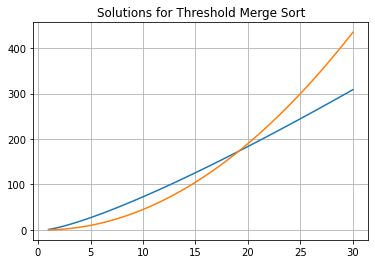

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 100 linearly spaced numbers between 1 and 20
x = np.linspace(1,30,100)

# the function, which is y = x^2 here
y1 = 3 * x * (np.log(x)/np.log(3)) + x
y2 = (x * (x - 1))/2

plt.title('Solutions for Threshold Merge Sort')
plt.grid()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

After running the new threshold algorithm for different threshold values across a range of input values (up to 1000 while testing), it seems as though the optimal threshold value is in the range of 10 to 50. Though no distuinguishable difference can be seen between threshold values for inputs of a very low size, you can see from the subsequent plots (input sizes 100, 1000, 10000) that there is a sharp decline in the time taken to run the algorithm as the threshold value increases to begin with. Between 15 and 50, all three of these graphs reach their lowest time. To improve the accuracy of this conclusion, I have randomly generated lists to reduce my bias, and also taken the average time over 100 runs of each threshold value. I also tested this code with a wider range of threshold values, however the lowest times were consistently reached below the threshold of 100 for these input values. Furthermore, you can see in the final plot that threshold values out of this range (5 and 100) generally take more time to run over a range of input sizes than values 10 and 50.

Analytically, the optimal value will be the value of n at which f(n) = g(n), where f(n) describes the complexity of the selection sort implementation on its own, and g(n) describes the complexity of the strictly recursive 3-way merge sort. By equating these exact functions equal to each other, we would be able to conclude the input size at which selection sort becomes more efficient than merge sort, and use this as our optimal threshold. f(n) = 3nlog3(n) + 3n (through solving recurrence relation) and g(n) = (n(n-1))/2 (through considering the nested for loops which don't run to the very end of the array). Through solving this, we get n to be equal to 19.1 (the solution of interest) or 0.65. 

Words: 311

**(d)** Finally, assess taking the hybrid approach (with the threshold) *versus* a strictly recursive algorithm (until the dividing step of the algorithm can no longer occur): 

1. make this comparison as complete as possible (the analysis should include no less than 100 words, and at most 300 words). 
2. your analysis must include both an analytical BigO complexity analysis, as well as graphical experimental evidence of your assertions. 
3. provide a word count. 

Analytically, we can derive the recurrence relation by considering the different parts of the divide and conquer algorithm. For the division part, since each recurrence splits the overall size of each array into 3 parts, we can break down the problem into T(n/3) for each branch, and 3T(n/3) to consider all 3 pathways. For the merge part of the algorithm, the time complexity can be described by theta(n), which we can determine by considering the for loops in the code which go over the entire input length in all cases. Overall, the time complexity of a 3-way merge sort can be given by T(n) = 3T(1/3 n) + Theta(n). By setting the number of levels at which division occurs equal to k, we derive n = 3^k to describe the total number of divisions, which can be simplified to k = log3(n) (log(n) = log(3^k) -> log3(n) = klog3(3) -> log3(n) = k). We can therefore multiply n and log3(n) to get the overall time complexity as for each division there must be a merge, giving theta(nlog3(n)). We us theta here as all processes must be undertaken regardless of the input, so the best, worst, and average cases all have the same time complexity.

To simplify our calculations to just consider each branch of the entire algorithm in which the threshold is reached. For each branch at which the threshold value is reached, the only difference between the 2 algorithms is the use of strictly recursion versus the use of strictly selection sort. We should therefore compare the use of these 2 algorithms to sort small-length arrays. Due to the 2 nested for loops, the first of which runs through the entire array, and the second through the unsorted section of the array, the selection sort used here makes (n(n-1))/2 comparisons. This gives it a time complexity of theta(n^2), as all of these comparisons are made for any input, therefore the asymptotic lower and upper bounds can both be given by the same order of n.

However, these complexity analyses only describe the growth in time taken for the functions as the input size grows, and cannot be applied to get accurate measurements of the time taken for small input sizes. We can therefore conclude that the coefficients/smaller orders of n are defined such that selection sort runs faster for smaller values of n, and this is why our threshold version of the algorithm runs faster than the strict 3-way merge.

Words: 358

As you can see from the graph below, the time taken to complete the threshold algorithm for randomly-generated inputs of size n is lower than that for the strictly merge sort version for all input values between 0 and 5000. We can likely extrapolate this conclusion for even larger values of n as both lines display somewhat linear growth.

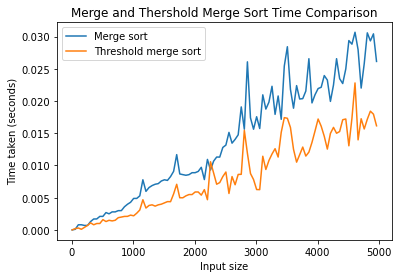

In [32]:
# compare merge and threshold merge times across large input range

inputs = [i for i in range(5, 5000, 50)]
m = []
s = []

# iterate over input range 5 to 5000
for i in inputs:
    merges = []
    selections = []
    
    # compute times taken 10 times for each input with random lists
    for j in range(10):
        inputi = randlist(i)

        start = time.time()
        merge_3_sort(inputi, 0, len(inputi))
        end = time.time()
        merges.append(end-start)
    
        start1 = time.time()
        merge_3_threshold(inputi, 0, len(inputi), 19)
        end1 = time.time()
        selections.append(end1-start1)
    
    # compute average time taken for each input
    m.append(sum(merges)/len(merges))
    s.append(sum(selections)/len(selections))

# plot
plt.plot(inputs, m)
plt.plot(inputs, s)
plt.legend(['Merge sort', 'Threshold merge sort'])
plt.xlabel('Input size')
plt.ylabel('Time taken (seconds)')
plt.title('Merge and Thershold Merge Sort Time Comparison')
plt.show()

## HC and LO Appendix
* #algorithms- I have coded a 3-way mergesort algorithm with a threshold for selection sort to be used instead. I have commented this implementation and included a docstring to increase the readability of my code. I have thoroughly tested this algorithm including many edge cases to ensure it works as desired.
* #datavisualisation- I have generated multiple plots as comparisons between different algorithms, and between different threshold values. I have analysed these plots to determine the optimal threshold value, and to experimentally show that the threshold algorithm is better than the strictly merge sort version.
* #professionalism- I have formatted my notebook, using markdown where necessary, to increase readability. I have also formatted my graphs such that these are easy to interpret, using titles, axis labels, and legends. 
* #cs110-ComputationalCritique- I have focused on the time complexity of a recursive and iterative implementation of a fibonacci calculator. I have compared the time efficiency of each algorithm using visualisations to aid my explanation, as well as explaining why recursion becomes increasingly inefficient for large input values.
* #cs110-ComplexityAnalysis- I have analysed the time complexity of both a 3-way merge sort and 3-way merge sort with selection at a specific threshold using the appropriate asymptotic notations. I have dsicussed specifically how these are derived, and why omega/O/theta are specifically chosen. I have also explained why this only describes the behaviour of the rate of increase of time in relation to input size as the input size grows larger, and why we cannot use this to determine the time taken for small input sizes.
* #cs110-PythonProgramming- I have created a 3-way merge sort algorithm using a threshold argument to switch to selection sort. I have used many tests (with edge cases) to determine that the algorithm works as expected. I have then plotted these results against my strictly recursive 3-way merge sort algorithm to show that it performs better.
* #cs110-CodeReadability- I have used docstrings in my sorting algorithms and fibonacci sequence algorithms to show their overall function, parameters and returns. I have adequately commented difficult parts of code so that it is more understandable, but not so much that it becomes cluttered. I have also included error messages in the fibonacci algorithms for users of the code and use when their input is not valid, explaining what they should input instead.
* #cs110-AlgorithmicStrategies- I have explained how the mystery sorting algorithm works, specifically detailing the termination condition. I have explained how and why this condition is not met in some cases. I have then fixed the code, and detailed how these fixes allow the termination condition to be met so that the code works as it should.